# **Avaliação parcial 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## **Questão 1 (TEÓRICA)**
## Considere que a variável $x \approx 2$ é conhecida com um erro relativo de 1% ($x = 2 \pm 1\%$), e a variável $y \approx 10$, com um erro relativo de 10% ($y = 10 \pm 10\%$). A partir de cálculos, determine o erro relativo $\Delta z$ associado a z ($z = \hat z \pm \Delta z$) quando (2,0 pontos):
$$ z = \frac{y^4}{1+y^4}.e^x$$

In [ ]:
# Variaveis
x, y = sp.symbols('x y')

# z(x,y)
z = (y**4 / (1 + y**4)) * sp.exp(x)

# Derivada parcial de z em relação a x
dz_dx = sp.diff(z, x)

# Derivada parcial de z em relação a y
dz_dy = sp.diff(z, y)

In [ ]:
print('dz/dx:\n')
dz_dx

dz/dx:



y**4*exp(x)/(y**4 + 1)

In [ ]:
print('dz/dy:\n')
dz_dy

dz/dy:



-4*y**7*exp(x)/(y**4 + 1)**2 + 4*y**3*exp(x)/(y**4 + 1)

In [ ]:
x_value = 2
y_value = 10
dx = 0.01 * x_value
dy = 0.1 * y_value

z_nominal = z.subs({x: x_value, y: y_value}) # z nominal
dz_dy_value = dz_dy.subs({x: x_value, y: y_value}) # valor de dz/dy aplicado nos pontos x e y
dz_dx_value = dz_dx.subs({x: x_value, y: y_value}) # valor de dz/dx aplicado nos pontos x e y

dza = dz_dx_value * dx + dz_dy_value * dy
dz = dza / z_nominal # erro relativo
print(f'z nominal = {z_nominal:.4f}')
print(f'dza = {dza:.4f}')
print(f'Erro relativo dz = {dz:.4f}')

z nominal = 7.3883
dza = 0.1481
Erro relativo dz = 0.0200


### Resposta:

$$\Delta z_a = \frac{\delta f}{\delta x}\cdot \Delta x_a + \frac{\delta f}{\delta y}\cdot \Delta y_a$$

$$\Delta z = \frac{\Delta z_a}{z_{nominal}}$$

$$z_{nominal} = 7.3883$$

$$\Delta x_a = 0.01 \cdot 2 = 0.02$$

$$\Delta y_a = 0.1 \cdot 10 = 1$$

---

$$\Delta z_a = \frac{y^4}{1+y^4}\cdot e^x \cdot \Delta x_a + \frac{4y^3e^x}{(1+y^4)^2} \cdot \Delta y_a$$

$$\Delta z_a = \frac{10^4}{1+10^4}\cdot e^2 \cdot 0.02 + \frac{4 \cdot 10^3 e^2}{(1+10^4)^2} \cdot 1$$

$$\Delta z_a \approx 0.1481$$

---

$$\Delta z = \frac{0.1481}{7.3883} = 0.02$$

## **Questão 2 (TEÓRICA)**
## Considere a equação $ \sqrt{x} = cos(x) $. Use o método da falsa posição com intervalo inicial [a, b] = [0,1] para calcular a aproximação $x^{(3)}$ da solução desta equação (2,0 pontos).

In [ ]:
def false_position(f,l,u,epsilon=1e-6,maxiter=100):
  iter = 0
  err = 1
  x = None
  xra = float('+inf')

  while err > epsilon and iter < maxiter:
    x = (l*f(u) - u*f(l))/(f(u) - f(l))

    if f(l)*f(x) < 0:
      u = x
    elif f(x)*f(u) < 0:
      l = x
    elif f(l)*f(u) == 0:
      break

    err = abs(x-xra)/abs(x)
    xra = x
    iter += 1
    print(f'x={x}; f(x)={f(x)}; erro={err}')

  return x, iter, err

In [ ]:
f2 = lambda x: np.sqrt(x) - np.cos(x)

In [ ]:
false_position(f2,0,1,maxiter=3)

x=0.6850733573260451; f(x)=0.053318949649390324; erro=inf
x=0.6503949801283647; f(x)=0.01062599405265563; erro=0.053318949649390185
x=0.6435565520339048; f(x)=0.002253032596046256; erro=0.010625994052655716


(0.6435565520339048, 3, 0.010625994052655716)

## **Questão 3 (PRÁTICA)**
## O desenho abaixo mostra um circuito não-linear envolvendo uma fonte de tensão constante, um diodo retificador e um resistor. Sabendo que a relação entre a corrente ($I_d$) e a tensão ($v_d$) no diodo é dada pela seguinte expressão:
$$I_d = I_r \cdot \bigg(exp\bigg(\frac{v_d}{v_t}\bigg)-1\bigg),$$
## em que $I_R$ é a corrente de condução reversa e $v_t$, a tensão térmica dada por $v_t = \frac{kT}{q}$ com $k$, a constante de Boltzmann, $T$, a temperatura de operação e $q$, a carga do elétron. Aqui, $I_R = 1pA = 10^{-12A}$, $T = 300 K$, $k = 1,380649 \cdot 10^{-23} m^2 kg s^{-2} K^{-1}$, $q = 1,60217663 \cdot 10^{-19}$. Escreva o problema como uma equação na incógnita $v_d$ e, usando o método da bissecção, resolva este problema com 3 algarismos significativos para os seguintes casos (3,0 pontos):

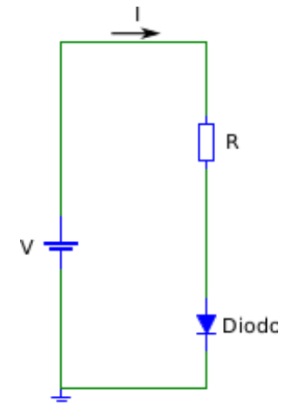

In [ ]:
i_R = 10**(-12)
T = 300
k = 1.380649 * 10**(-23)
q = 1.660217663 * 10**(-19)

vt = k*T/q

req = 1000
V_fonte_a = 30
V_fonte_b = 3

In [ ]:
def voltagem_diodo(V_fonte, v_diodo, req=1000, i_R=10**(-12), vt=k*T/q):
    return V_fonte - v_diodo - req*i_R*(np.exp(v_diodo/vt) - 1)

In [ ]:
def bissection(voltagem_diodo, V_fonte, a, b, algsig=3, tol=1e-6, maxiter=100):
    iter = 1
    x_ant = 0

    while iter < maxiter:
        x_atual = (a + b) / 2
        erro = (x_atual - a) / x_atual

        fa = voltagem_diodo(V_fonte, a)
        fb = voltagem_diodo(V_fonte, b)
        fx_atual = voltagem_diodo(V_fonte, x_atual)

        print(f'iter={iter}, voltagem_diodo:={x_atual}, f(x)={voltagem_diodo(V_fonte,x_atual)}, erro={erro}')

        if int((10**algsig)*x_ant)/(10**algsig) == int((10**algsig)*x_atual)/(10**algsig):
            break

        x_ant = x_atual

        if fa*fx_atual < 0:
            b = x_atual
        elif fx_atual*fb < 0:
            a = x_atual

        iter += 1

    return x_atual

In [ ]:
bissection(voltagem_diodo, V_fonte_a, 0, 1)

iter=1, voltagem_diodo:=0.5, f(x)=28.994270430434128, erro=1.0
iter=2, voltagem_diodo:=0.75, f(x)=-11343.81502148416, erro=0.3333333333333333
iter=3, voltagem_diodo:=0.625, f(x)=-46.46493202252866, erro=0.2
iter=4, voltagem_diodo:=0.5625, f(x)=23.244399303126283, erro=0.1111111111111111
iter=5, voltagem_diodo:=0.59375, f(x)=7.734048083760246, erro=0.05263157894736842
iter=6, voltagem_diodo:=0.609375, f(x)=-11.150937872224937, erro=0.02564102564102564
iter=7, voltagem_diodo:=0.6015625, f(x)=-0.24317069810077996, erro=0.012987012987012988
iter=8, voltagem_diodo:=0.59765625, f(x)=4.056754035181115, erro=0.006535947712418301
iter=9, voltagem_diodo:=0.599609375, f(x)=1.990829521679828, erro=0.003257328990228013
iter=10, voltagem_diodo:=0.6005859375, f(x)=0.8956692014020788, erro=0.0016260162601626016
iter=11, voltagem_diodo:=0.60107421875, f(x)=0.3318165794166674, erro=0.0008123476848090983
iter=12, voltagem_diodo:=0.601318359375, f(x)=0.04572842613299599, erro=0.0004060089321965083


0.601318359375

In [ ]:
bissection(voltagem_diodo, V_fonte_b, 0, 1)

iter=1, voltagem_diodo:=0.5, f(x)=1.994270430434128, erro=1.0
iter=2, voltagem_diodo:=0.75, f(x)=-11370.81502148416, erro=0.3333333333333333
iter=3, voltagem_diodo:=0.625, f(x)=-73.46493202252866, erro=0.2
iter=4, voltagem_diodo:=0.5625, f(x)=-3.7556006968737163, erro=0.1111111111111111
iter=5, voltagem_diodo:=0.53125, f(x)=0.6989946064872763, erro=0.058823529411764705
iter=6, voltagem_diodo:=0.546875, f(x)=-0.8575053572282578, erro=0.02857142857142857
iter=7, voltagem_diodo:=0.5390625, f(x)=0.040399144412352594, erro=0.014492753623188406
iter=8, voltagem_diodo:=0.54296875, f(x)=-0.3737827249749319, erro=0.007194244604316547
iter=9, voltagem_diodo:=0.541015625, f(x)=-0.15866606078710666, erro=0.0036101083032490976
iter=10, voltagem_diodo:=0.5400390625, f(x)=-0.05720478635436521, erro=0.0018083182640144665
iter=11, voltagem_diodo:=0.53955078125, f(x)=-0.007930043430146583, erro=0.0009049773755656109
iter=12, voltagem_diodo:=0.539306640625, f(x)=0.016351591077368166, erro=0.0004526935264

0.539306640625

## **Questão 4 (PRÁTICA)**
## Seja o polinômio $f(x) = x^4 - 3x^3 + 5x^2 - x - 10$, identifique uma região do eixo XY contendo pelo menos uma raiz real, e então aplique o método do ponto fixo para encontrar uma raiz real a partir de uma inicialização adequada, com base na região previamente demarcada. Itere até que o erro satisfaça a tolerância $\epsilon = 0,1\%$. (3 pontos)

In [ ]:
coef = [-10, -1, 5, -3, 1] #2, -1
grau = 4
rho_1 = grau * (abs(coef[0])/abs(coef[1]))
rho_n = (abs(coef[0])/abs(coef[grau]))**(1/grau)
x0 = min(rho_1, rho_n)
print(x0)

1.7782794100389228


In [ ]:
f4 = lambda x: x**4 -3*x**3 +5*x**2 -x -10
g4 = lambda x : (3*x**3 - 5*x**2 + x + 10)**(1/4)

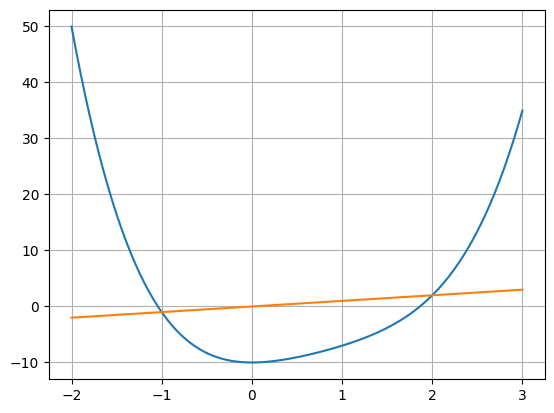

In [ ]:
x = np.linspace(-2,3,100)
plt.plot(x,g4(x))
plt.plot(x,x)
plt.grid()

In [ ]:
def fixed_point(g, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x1 = None

  while err > epsilon and iter < maxiter:
    x1 = g(x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1
    print(f'x={x0}; f(x)={g(x0)}; erro={err}')

  return x0, err, iter

In [ ]:
fixed_point(g4, x0)

x=1.892853455052594; f(x)=1.9454342569337928; erro=0.060529802086811677
x=1.9454342569337928; f(x)=1.9716073915273857; erro=0.027027796849877453
x=1.9716073915273857; f(x)=1.9850755505427717; erro=0.013275023570142359
x=1.9850755505427717; f(x)=1.9921150555468932; erro=0.0067847085274429265
x=1.9921150555468932; f(x)=1.995823269213732; erro=0.003533683952902449
x=1.995823269213732; f(x)=1.997784513434946; erro=0.0018579869891484975
x=1.997784513434946; f(x)=1.9988239789098563; erro=0.000981709592813731
x=1.9988239789098563; f(x)=1.9993755080657813; erro=0.0005200385255920947
x=1.9993755080657813; f(x)=1.999668314568326; erro=0.0002758507112346301
x=1.999668314568326; f(x)=1.9998238135247994; erro=0.00014642753521246639
x=1.9998238135247994; f(x)=1.9999064069756813; erro=7.775632804336957e-05
x=1.9999064069756813; f(x)=1.9999502804103657; erro=4.129865807410826e-05
x=1.9999502804103657; f(x)=1.9999735869490283; erro=2.1937262698035353e-05
x=1.9999735869490283; f(x)=1.999985968202422; er

(1.999985968202422, 6.1906701299376445e-06, 15)